In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud

In [2]:
# Set visual style
sns.set(style="whitegrid")

In [3]:
# Load the dataset
file_path = "Twitter_Data.csv"
df = pd.read_csv(file_path)

In [4]:
# Display initial data information
print("Initial Data Information:")
print(df.info())
print("\nSample Data:")
print(df.head())

Initial Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None

Sample Data:
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
clean_text    4
category      7
dtype: int64


In [6]:
# Drop any rows with missing values
df.dropna(inplace=True)

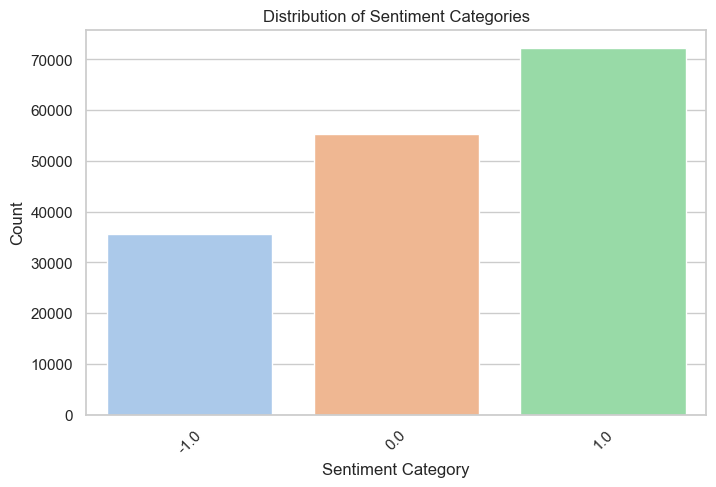

In [7]:
# Check the distribution of sentiment categories
plt.figure(figsize=(8, 5))
sns.countplot(x='category', data=df, palette='pastel')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

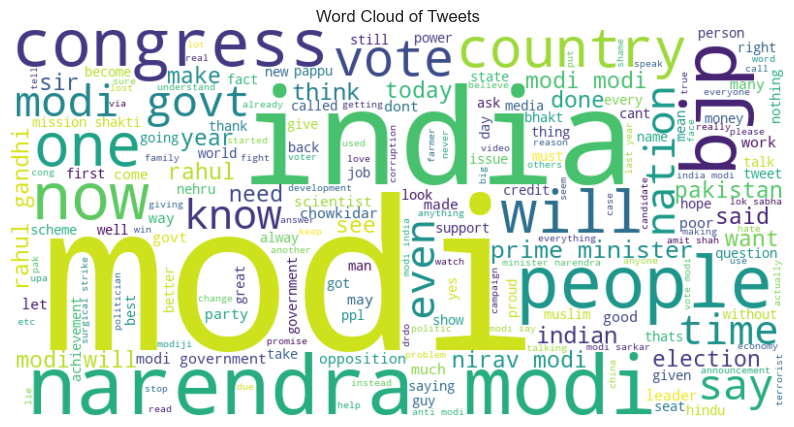

In [8]:
# Word Cloud Visualization
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(" ".join(df['clean_text']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

In [9]:
# Splitting the dataset into training and test sets
X = df['clean_text']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [11]:
# Training a Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [12]:
# Predictions
y_pred = model.predict(X_test_tfidf)

In [13]:
# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

        -1.0       0.95      0.10      0.19      7152
         0.0       0.92      0.32      0.47     11067
         1.0       0.51      0.99      0.67     14375

    accuracy                           0.57     32594
   macro avg       0.79      0.47      0.44     32594
weighted avg       0.75      0.57      0.50     32594



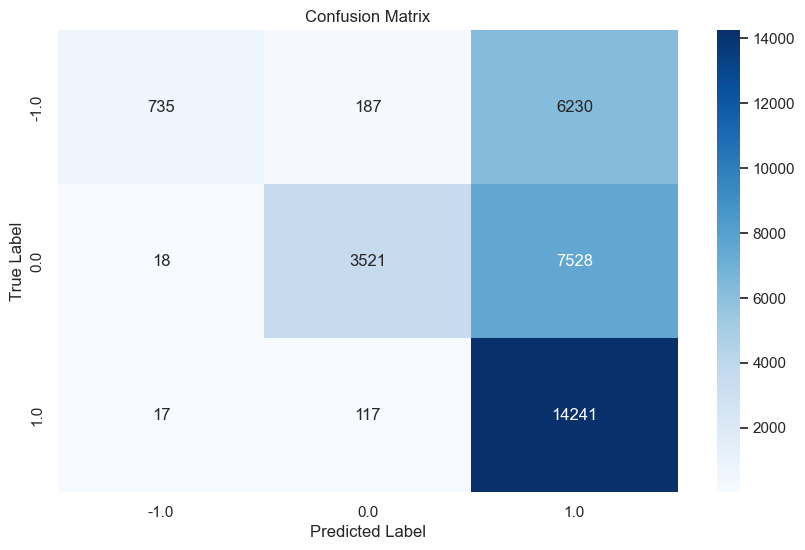

In [14]:
# Confusion Matrix
plt.figure(figsize=(10, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

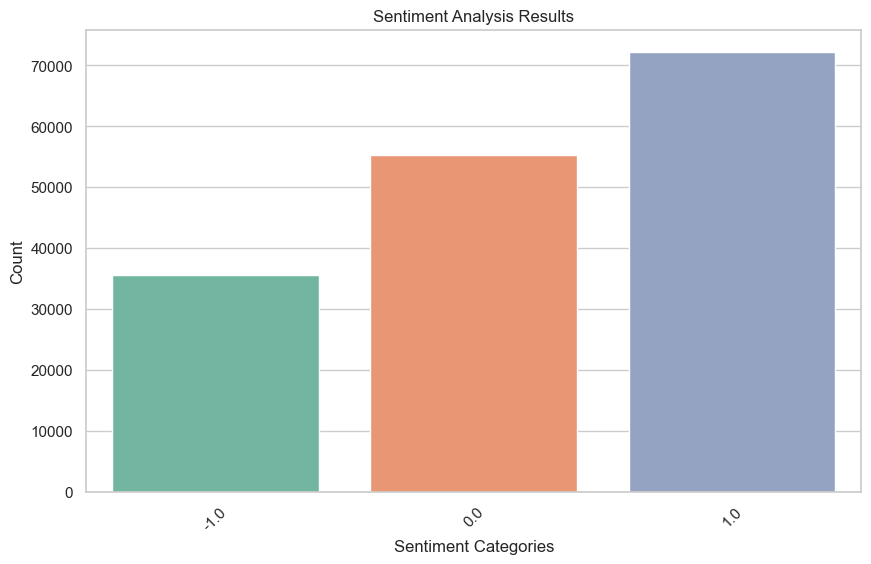

In [15]:
# Visualize sentiment predictions
sentiment_counts = df['category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set2')
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment Categories')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
# N-grams Analysis
def plot_top_n_grams(corpus, n=2, top_n=10):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_words = words_freq[:top_n]

    # Dataframe for visualization
    top_words_df = pd.DataFrame(top_words, columns=['word', 'count'])
    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='word', data=top_words_df, palette='magma')
    plt.title(f'Top {top_n} {n}-grams')
    plt.xlabel('Count')
    plt.ylabel('N-grams')
    plt.show()

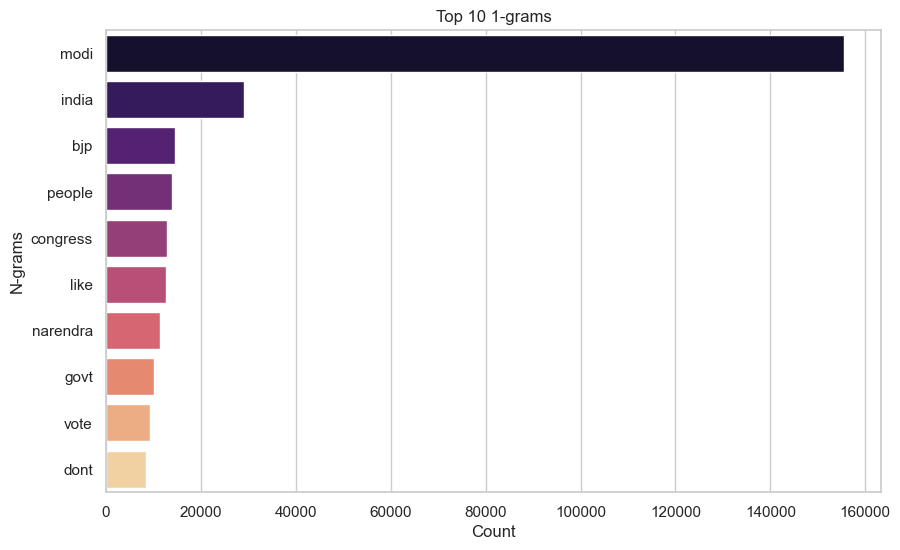

In [17]:
# Plotting unigrams bigrams
plot_top_n_grams(df['clean_text'], n=1, top_n=10)  # Unigrams

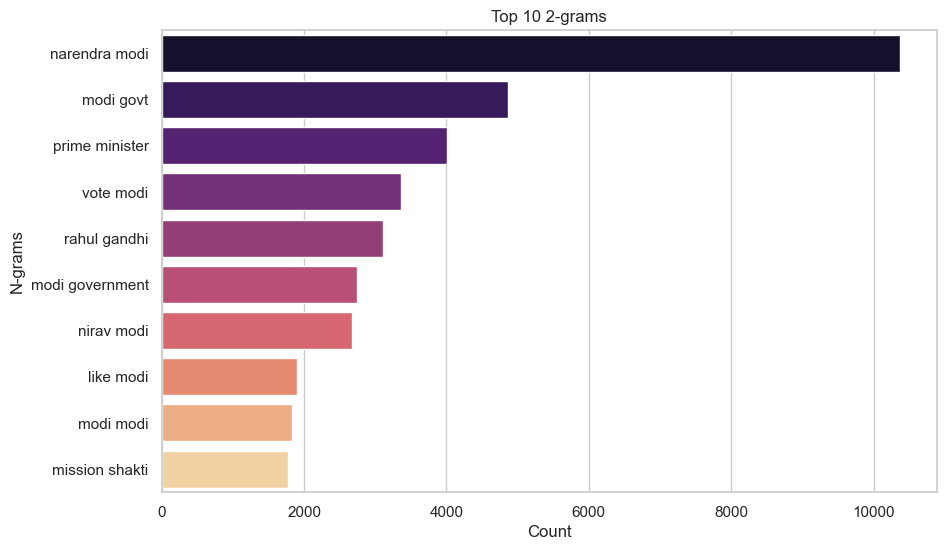

In [18]:
# Plotting bigrams
plot_top_n_grams(df['clean_text'], n=2, top_n=10)  # Bigrams